## Retirement Calculator

This Python script uses data from Vanguard Target Retirement Funds to calculate estimated retirement income.

In [47]:
# Libraries
import yfinance as yf
from statistics import mean, stdev
from random import choice
from matplotlib.pyplot import hist, show, xlabel, ylabel, title
from datetime import datetime

Vanguard Target Retirement 2025 Fund (VTTVX) data is used to project income up until retirement. The Vanguard Target Income Fund (VTINX) and CPI data are used to forecast the balance post-retirement, in addition to considering withdrawals. Some summary statistics are output below.

In [44]:
# Read in VTTVX Vanguard Target 2025 Fund changes November 1, 2003 - June 30, 2023
vttvxdf = yf.download("VTTVX", end=datetime(2023, 6, 30), interval='1mo')
vttvxdf
vttvxdf['pct_change'] = vttvxdf[['Close']].pct_change()
print(mean(vttvxdf.iloc[1:]['pct_change']))
print(choice(vttvxdf.iloc[1:]['pct_change']))
# hist(vttvxdf.iloc[1:]['pct_change'])
# show()

# Read in Vanguard Target Income Fund Changes July 1, 2007 - June 30, 2023
vtinxdf = yf.download("VTINX", start=datetime(2007, 7, 1), end=datetime(2023, 6, 30), interval='1mo')
vtinxdf
vtinxdf['pct_change'] = vtinxdf[['Close']].pct_change()
print(mean(vtinxdf.iloc[1:]['pct_change']))
print(choice(vtinxdf.iloc[1:]['pct_change']))

# Read in monthly CPI change June 1, 2013 - June 1, 2023 from St. Louis Fed FRED Database
# File stored in Python project directory
inflation=[]
cpichange = open("CPI change.csv", "r")
for line in cpichange:
    rate = line
    rate = float(rate)
    inflation.append(rate)
cpichange.close()
# print(inflation)
print(mean(inflation))
print(stdev(inflation))
print(mean(inflation)*1200) #Inflation rate

[*********************100%***********************]  1 of 1 completed
0.002982740187943188
-0.007564325223134216
[*********************100%***********************]  1 of 1 completed
0.0010613420970397556
0.011992630314666686
0.0022386277993333334
0.0028594901529768574
2.6863533592


Retirement withdrawals are the total balance/months of retirement, which is hard-coded at 360 for 30 years. The monthly withdrawal is considered the equivalent of monthly income.

Enter sim times 10
Enter starting balance 10000
Enter monthly contribution 500


The current year is 2023


Enter retirement year 2055


10
350287.5
Your average monthly income would be: $770.45.


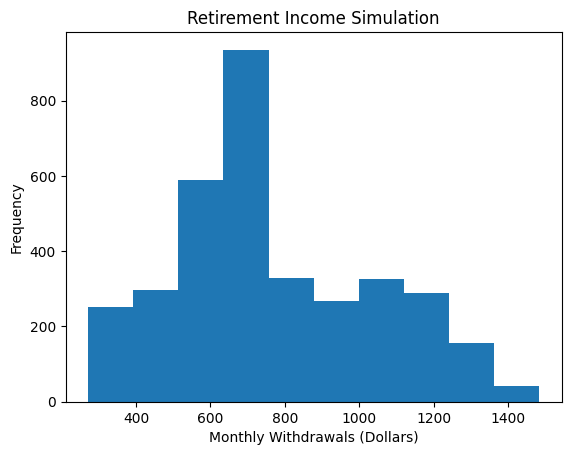

In [48]:
times = int(input("Enter sim times"))
prebalance = float(input("Enter starting balance"))
contribution = float(input("Enter monthly contribution"))
# startyear = int(input("Current year"))
startyear = datetime.now().year
print("The current year is", startyear)
retyear = int(input("Enter retirement year"))
premonths = monthcalc(startyear,retyear)
# print(premonths)
rate = prerate()
ballist =[]
wdlist=[]
for t in range(times):
    balance = prebalance
    for m in range(1,premonths+1):
        rate = prerate()
        # print(rate)
        balance = balance*(1+rate)+contribution
    ballist.append(balance)
    months = monthcalc(retyear + 1, retyear + 30)
    # print(months)
    # withdrawal = balance/months
    # print(withdrawal)
    while months > 0:
        postretrate = postratefunc()
        # print(postretrate)
        withdrawal = balance / months
        wdlist.append(withdrawal)
        balance = (balance*(1+postretrate))-withdrawal
        months -= 1
print(len(ballist))
print(round(mean(ballist), 2))
# print(wdlist)
avg = round(mean(wdlist),2)
print("Your average monthly income would be: $"+str(avg)+".")
# print(round(mean(wdlist),2))
hist(wdlist)
title('Retirement Income Simulation')
xlabel('Monthly Withdrawals (Dollars)')
ylabel('Frequency')
show()

Ideas for improvemnt include:
* Use of different or more funds or indexes
* Flexibility in retirement years, instead of hard-coding 30 years
* Calculate and project in terms of years and months, not just a duration of years
* Factor some inflation into the pre-retirment calculations, especially further out in the pre-retirement years